# NYPD_Allegations 


### This portfolio is a detailed analysis of Civil Complaints Review Board (CCRB) complaints made against the NYPD between 1985 and 2020. The portfolio is split into two sections 

1. All complaints  - this is an investigation into the total number of complaints that have been registed by the CCRB - this includes both substantiated and unsubstantiated complaints made by members of the public. 
2. Substantiated complaints - this is an investigation into the number of complaints that have been investigated (by the NYPD) and resulted in some sort of disciplinary action by the NYPD. 

Throughout the portfolio are some explanations that discuss key aspects of the data or visualization. 

Any questions, comments or tips or ideas for futher analysis can be forwarded to my email. jordan.creenaune@gmail.com 

Data taken from 

[Data taken from NYPD database](https://www1.nyc.gov/site/ccrb/policy/data-transparency-initiative-mos.page#complaint_sub)

[Gothamist Article on NYPD complaint data](https://gothamist.com/news/nypd-police-ccrb-database-shows-confirmed-record-misconduct)





In [2]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [5]:
nypd_allegations = pd.read_csv("/Users/jordancreenaune/Documents/GitHub/NYPD_allegations/allegations.csv")

#A snapshot of the data.
nypd_allegations.head(3)

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,42835,7,2019,5,2020,078 PCT,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)


In [6]:
#Description of code - introductory exploration 
nypd_allegations.describe() 

,unique_mos_id,complaint_id,month_received,year_received,month_closed,year_closed,mos_age_incident,complainant_age_incident,precinct
count,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,33358.000000,28546.000000,33334.000000
mean,18169.912495,23905.058217,6.323551,2010.726782,6.470772,2011.525661,32.346873,32.484201,64.365213
std,9566.316896,11954.434138,3.362951,6.034725,3.343372,6.085907,6.040944,28.408963,31.451592
min,2.000000,517.000000,1.000000,1985.000000,1.000000,1985.000000,20.000000,-4301.000000,0.000000
25%,9671.000000,13684.750000,3.000000,2007.000000,4.000000,2008.000000,28.000000,23.000000,43.000000
50%,19215.000000,25132.000000,6.000000,2012.000000,6.000000,2013.000000,31.000000,30.000000,67.000000
75%,25412.000000,34252.000000,9.000000,2016.000000,9.000000,2016.000000,36.000000,41.000000,81.000000
max,36374.000000,43703.000000,12.000000,2020.000000,12.000000,2020.000000,60.000000,101.000000,1000.000000


In [7]:
#When isolating a single officer to check duplicates

officer_example = nypd_allegations[nypd_allegations["unique_mos_id"] == 9984] 
officer_example

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
33345,9984,Hassan,Paris,078 PCT,9410,6,2005,9,2005,078 PCT,...,26,Hispanic,Male,27.0,Force,Physical force,78.0,Parking violation,Parking summons issued,Unsubstantiated
33346,9984,Hassan,Paris,078 PCT,9410,6,2005,9,2005,078 PCT,...,26,Hispanic,Male,27.0,Abuse of Authority,Threat of arrest,78.0,Parking violation,Parking summons issued,Exonerated
33347,9984,Hassan,Paris,078 PCT,9410,6,2005,9,2005,078 PCT,...,26,Hispanic,Male,27.0,Discourtesy,Word,78.0,Parking violation,Parking summons issued,Unsubstantiated
33348,9984,Hassan,Paris,078 PCT,42835,7,2019,5,2020,078 PCT,...,40,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
33349,9984,Hassan,Paris,078 PCT,42835,7,2019,5,2020,078 PCT,...,40,Black,Female,38.0,Abuse of Authority,Threat of summons,78.0,Report-domestic dispute,No arrest made or summons issued,Exonerated
33350,9984,Hassan,Paris,078 PCT,42835,7,2019,5,2020,078 PCT,...,40,Black,Female,38.0,Abuse of Authority,Threat of arrest,78.0,Report-domestic dispute,No arrest made or summons issued,Exonerated
33351,9984,Hassan,Paris,078 PCT,42835,7,2019,5,2020,078 PCT,...,40,Black,Female,38.0,Abuse of Authority,Property damaged,78.0,Report-domestic dispute,No arrest made or summons issued,Exonerated


The above code attemps to discover duplicates in the data. What is evident here is that althought dates, mos_id, names and complaint_id are identical, it is clear that the individual lodging the complain has put forward multiple allegations under the same incident. An example above indicates that under one incident the officer was alleged under the following complaints, abuse of authority and discourtesy in the same incident. Note that there are still substantiated, exonerated and unsubstantiated complaints within this dataset. 

In [8]:
#Check duplicates of columns 

#duplicates have been deleted from the df 
total_clean = nypd_allegations[nypd_allegations[['first_name', 'last_name', 'complaint_id','allegation']].duplicated() == False]

clean1_count_row = total_clean.shape[0]

clean1_count_row

31374

Data cleaning 1 - This script removes duplicates by using a combination of the first_name, last_name, complaint_id and allegation. Using these tags we can ensure duplicate data among rows is eliminated from the dataset. 

In [9]:
#Isolate duplicates to be potentially used later. 

#Isolate duplicates
duplicates = nypd_allegations[nypd_allegations[['first_name', 'last_name', 'complaint_id','allegation']].duplicated() == True]

#Find out how many duplicates have been deleted. 
duplicates_count = duplicates.shape[0]

duplicates_count

1984

This demonstrates that there are 1984 rows in this data set that are duplicate events, involving, same name, complaint Id and allegation. 

##### All complaints 

Data 1 = Age 
First we will investigate age data of all complaints made against police officers from 1985 - 2020. 

<IPython.core.display.Javascript object>


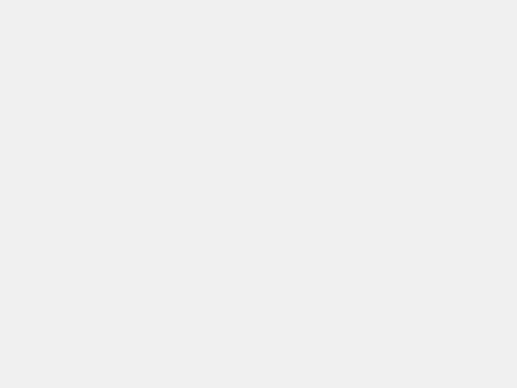

<IPython.core.display.Javascript object>


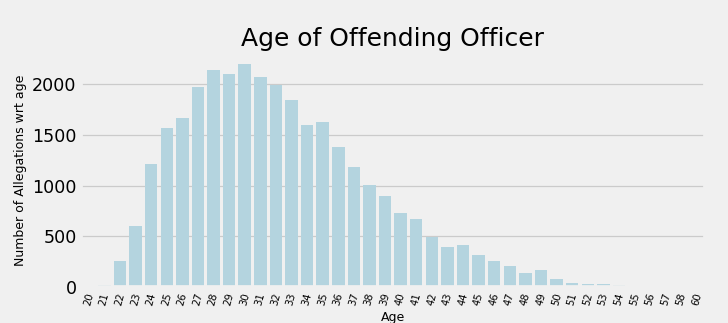

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Allegations wrt age')

In [15]:
#age of officers - breakdown 
plt.figure(1)
#Remove any ages that do not have have ages 
nypd_allegations = total_clean[total_clean.mos_age_incident != '(null)']
#ensure that mos_age_incident is an int
off_age_clean = pd.to_numeric(nypd_allegations['mos_age_incident'])

#Plotting histogram
plt.style.use('fivethirtyeight')


plt.figure(figsize=(9,4))
sns.countplot(off_age_clean.astype(int),color ='lightblue')
plt.title("Age of Offending Officer", fontsize = 20)
plt.xlabel('Age', fontsize = 10)

plt.xticks(fontsize = 8, rotation = 75)

plt.subplots_adjust(left=0.1, bottom=0.2, right=0.87, top=0.85)
plt.ylabel('Number of Allegations wrt age', fontsize = 10)

The above visualisation details the age of the officers in question who have had complaints made against them. From this data we note that the age with the greatest number of complaints is 30 and a gradual decline as the age of the officer increases. This is based on a total of 33358 complaints made against officers by members of the public. 

There are a number of reasons as to why there is a critical mass of complaints made against officers between 27 and 34. 
1. Many of these younger officers are public facing in their day to day work so face more exposure during their day to members of the public. 
2. Officers are this age are somewhat new to their career and therefore inexperienced. 
3. Many officers retire or leave the force quite young and later in their careers they are promoted to various roles that may not be so public facing. 
4. There is a critical mass of officers that are employed between these ages. The high number of complaints is reflective of the age breakdown of the entire NYPD
5. When looking at complaint data, it must be acknowledged that some of these officers have had multiple complaints made against them, so what is seen here is not individual officers, instead, individual complaints. This will be investiated later in the notebook. 

##### Data 2 - All complaints - Officer race 

In [16]:
# Race of officers - Graph 
OfficerEthnicity = nypd_allegations['mos_ethnicity']
RaceValue = OfficerEthnicity.unique()

RaceCount = OfficerEthnicity.value_counts()
RaceCount

White              16991
Hispanic            8625
Black               4631
Asian               1097
American Indian       30
Name: mos_ethnicity, dtype: int64

<IPython.core.display.Javascript object>


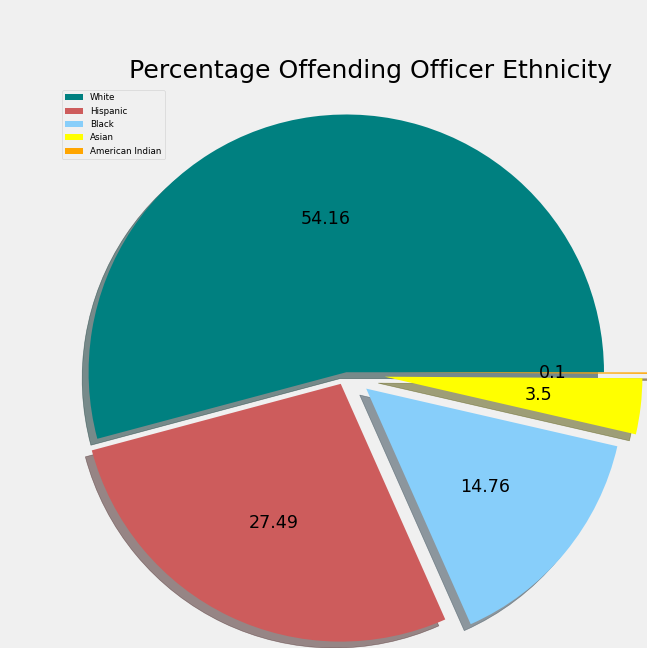

In [33]:
#This graph is a breakdown of the race of the officer receiving the complaint. 
#Please note that these are unique complaints. 
#Many officers received multiple complaints during their employment. 



suspect_ethnicity = nypd_allegations['mos_ethnicity']
ethnicity_count = suspect_ethnicity.value_counts()
ethnicity_value = suspect_ethnicity.unique()
total_rows = len(nypd_allegations)

plt.figure(figsize=(8,8))
labels = ethnicity_value
#sizes = nypd_allegations['mos_ethnicity'].value_counts().sort_index() / total_rows*100
sizes = ((ethnicity_count / total_rows) * 100)
colors = ['teal', 'indianred', 'lightskyblue', 'yellow', 'orange']

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 2)
    return a
explode = (0, 0.05, 0.1, 0.15, 0.2)
plt.pie(sizes, colors=colors,
        autopct=absolute_value, shadow=True, explode=explode)
plt.title('Percentage Offending Officer Ethnicity')

plt.legend(labels=ethnicity_count.index,loc=2, prop={'size': 7})



plt.axis('equal')
plt.show()

The above visualisation details the racial breakdown of the police officers recieving the complaints. 54% of the 33358 complaints were made against white police officers. Followed by Hispanic police officers, 9150 or 27%, Black police officers 4924 or 14%, Asian police officers 1178 or 3% followed by American Indian 0.1% or 32 complaints. 

There is an overwhelming majority of white officers with complaints made against them. Once again these are not necessarily different officers, many officers have recieved multiple complaints. This data is taken from the previous 45 years, so doing a comparison between racial breakdown of the police force and these complaints is not possible due to the lack of data detailing officer race each year. What is known however is that these complaints are not proportional or comparable to racial breakdown of the city or the gender breakdown of the city which will be investigated next. This highlights wider implications on not only complaints, but also hiring practices by the NYPD and inability to attract and hire a police force that is representative of the city that it is serving. 

##### Data 3 - All complaints - Officer sex

In [34]:
# Gender of Member of Service
OfficerGender = nypd_allegations['mos_gender']
GenderValue = OfficerGender.unique()

GenderCount = OfficerGender.value_counts()
GenderCount


M    29696
F     1678
Name: mos_gender, dtype: int64

In [35]:
#Calculate the percentage of male vs female officer complaints

totalcount = len(nypd_allegations.index)
gender = nypd_allegations['mos_gender'].value_counts()

malepercent = (gender.iloc[0]/totalcount)*100
femalepercent = (gender.iloc[1]/totalcount)*100
print(malepercent)
print(femalepercent)

94.65162236246573
5.348377637534265


<IPython.core.display.Javascript object>


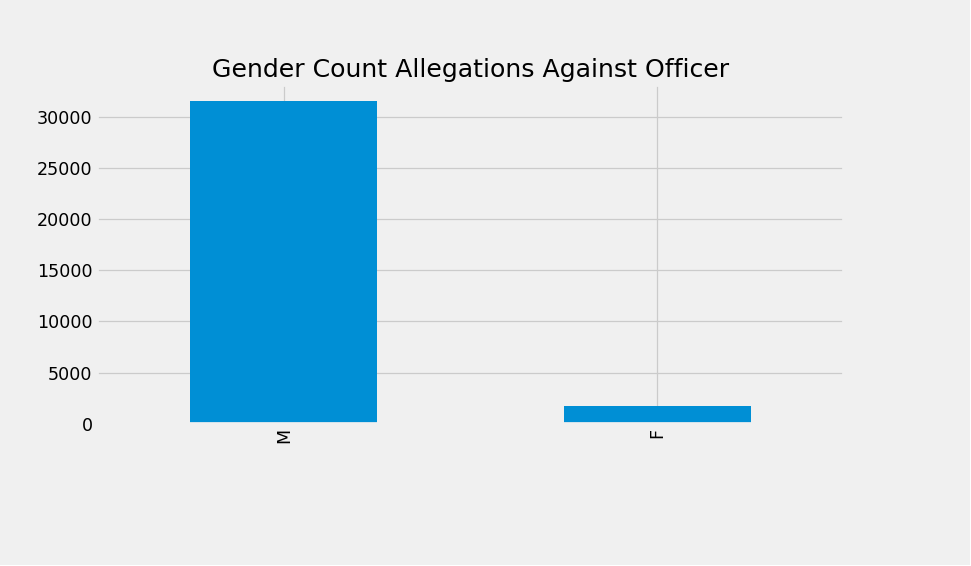

Text(0.5, 1.0, 'Gender Count Allegations Against Officer')

In [9]:
#This graph below details the Gender of the Police Officer who is receiving the complaint.
#plt.figure(5)
plt.figure(figsize=(12,7))
nypd_allegations['mos_gender'].value_counts().plot(kind='bar')
plt.subplots_adjust(left=0.1, bottom=0.25, right=0.87, top=0.85)
plt.title('Gender Count Allegations Against Officer')

The above visualisation details the sex of all complaints. What is clear here, is an overwhelming majority of the 33358 complaints have been made against male police officers. Once again this is not reflective or comparable to the sex breakdown of the NYPD as a whole nor reflective of the sex breakdown of the city of the New York. There are two concerns that this raises, one is that male police officers are more likely to commit offences that are deemed worthy of a complaint by the public, and second the lack of complaints against female officers result from better policing methods and the male female disparity of the NYPD. 

What is even more alarming about this data, is the following, we begin to generate this picture of the majority of complaints of misconduct being made against a police officer who is between the ages of 27 and 34, who is white and male. This is problematic in a city like New york, the authority to protect and serve is not representative of the population with regard to race, sex or age. 

As of 02/02/2021, the gender breakdown of the NYPD police force is 81% Male (28,382) and 19% Female (6,578). If allegation rates were consistent with the population of police officers the rate of allegations should be similar to the gender breakdown of the force. As the comparison between these two data sets reveals, this is not the case.

https://www1.nyc.gov/site/ccrb/policy/data-transparency-initiative-mos.page

Whilst it is difficult to compare these statistics, as complaint data was taken over the course of 45 years and we currently have a single snapshot of the sex breakdown of the NYPD we can still gauge some idea of the disparity between complaints made against male or female officers. 95% of complaints were made against male officers and 5% made against female officers. This is not necessarily representative of the current sex make up of the NYPD, one can only assume that there is an increasing amount of women on the force than there were say in the 80s and 90s. This makes the statitical comparison even more stark. 



##### Data 4 - All complaints - Top offenders

In [36]:
#find the top 20 worst offenders - 

#Isolate three columns 
mosId = nypd_allegations.iloc[:, 0:3]
#Groupby to find total complaints of a single officer 
mosId = mosId.groupby(mosId.columns.tolist()).size().reset_index().\
    rename(columns={0:'total'})
#Sort by total column of 
Id_sort = mosId.sort_values('total',ascending = False)
Id_sort.reset_index(drop=True, inplace=True)
Idsort = Id_sort.head(20)
#Prints to markdown cell 

Idsort

,unique_mos_id,first_name,last_name,total
0,18731,Daniel,Sbarra,73
1,25861,Mathew,Reich,71
2,19489,Gary,Messina,65
3,18589,Christophe,Mccormack,64
4,22775,David,Cheesewright,57
5,25814,William,Taylor,56
6,25478,Paul,Mcmahon,54
7,20982,Mike,Civil,52
8,32054,Michael,Raso,47
9,25785,Matthew,Lewis,46


The above dataframe highlights the number of complaints made against the top 20 offending officers. The top two officers have over 70 complaints made against them, later in this notebook, we will investigate how many of these were substantiated. A quick google search on office Daniel Sbarra will indicate that the city has spent millions of dollars settling complaints and abuse of power by him and he has been relegated to a desk job out of public interaction. 

Looking in the CCRB website and the complaint form we can gain an understanding of what it takes to actually make a complaint. Officers are required to hand over a business card if it is requested during an interaction but it is not always possible. Part of the form below will shed some light into the information used by the CCRB to identify police officers. 

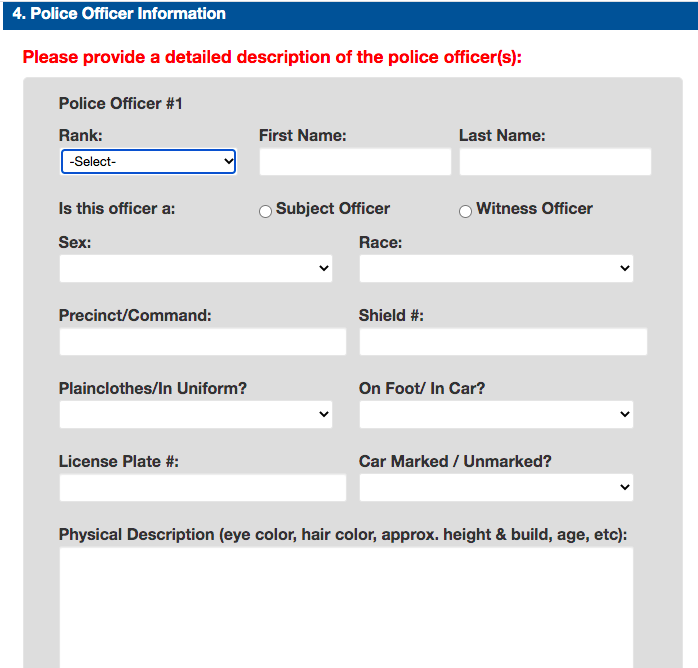



In [38]:
#Reference and isolate column detailing precinct 
PrecinctTotal = nypd_allegations.iloc[:, 22].to_frame()

#Groupby to find total complaints of each precinct, create new column with total
PrecinctTotal = PrecinctTotal.groupby(PrecinctTotal.columns.tolist()).size().reset_index().\
    rename(columns={0:'total'})

PrecinctTotal  = PrecinctTotal .sort_values('total',ascending = False)
PrecinctTotal.reset_index(drop=True, inplace=True)
PrecinctTotal = PrecinctTotal .head(20)

PrecinctTotal

,precinct,total
0,75.0,2072
1,73.0,1107
2,67.0,1064
3,44.0,1063
4,46.0,1060
5,79.0,1011
6,40.0,936
7,77.0,892
8,47.0,891
9,120.0,791


In [25]:
#Substantiated vs Unsubstansitated complaints - and the problematic issues that arise from
#investigating your own crimes as a police force 

#Isolate column to get an idea of what the string will look like.
#We need to isolate the first word 

SubVsUn = nypd_allegations['board_disposition']
SubVsUn.head()

0    Substantiated (Command Lvl Instructions)
1                     Substantiated (Charges)
2                     Substantiated (Charges)
3                     Substantiated (Charges)
4        Substantiated (Command Discipline A)
Name: board_disposition, dtype: object